After a debt has been legally declared "uncollectable" by a bank, the account is considered to be "charged-off." But that doesn't mean the bank simply walks away from the debt. They still want to collect some of the money they are owed. In this project, you will look at a situation where a bank assigned delinquent customers to different recovery strategies based on the expected amount the bank believed it would recover from the customer. The goal for the data scientist is to determine in this non-random assignment whether the incremental amount the bank earns exceeded the additional cost of assigning customers to a higher recovery strategy.
Threshold assignments like this also one occur in medicine (above a certain temperature you get medicine), education (above a certain test score students get admitted to a special class), other areas of finance (above a certain wealth customers get different levels of service), and public sector (below a certain income someone is eligible for housing benefits). Regression discontinuity is an intuitive and useful analysis method in any situation of a threshold assignment.

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load Data_set

In [2]:
df=pd.read_csv(rf"D:\Excel\project\Dataset MeriSKILL\bank_data.csv")
df

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


### Check Columns name

In [3]:
df.columns

Index(['id', 'expected_recovery_amount', 'actual_recovery_amount',
       'recovery_strategy', 'age', 'sex'],
      dtype='object')

In [4]:
#Check number of colunms and row
df.shape

(1882, 6)

In [5]:
# Check data types
df.dtypes


id                            int64
expected_recovery_amount      int64
actual_recovery_amount      float64
recovery_strategy            object
age                           int64
sex                          object
dtype: object

In [6]:
# check information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


<Axes: >

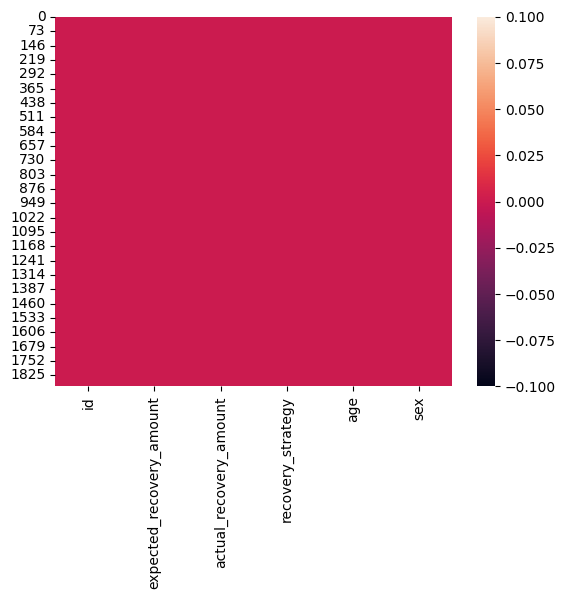

In [7]:
# show null values in heatmap graph
sns.heatmap(df.isnull())

In [8]:
df.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [9]:
#remove unused columns
df.drop(columns='id',inplace=True)
df.columns


Index(['expected_recovery_amount', 'actual_recovery_amount',
       'recovery_strategy', 'age', 'sex'],
      dtype='object')

In [10]:
df.describe()

,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000
mean,2759.967588,4000.967837,39.650372
std,2019.826565,4576.506350,15.453072
min,194.000000,200.425000,18.000000
25%,1261.250000,1045.190300,28.000000
50%,2062.000000,2115.446373,35.000000
75%,3569.500000,5417.237207,50.000000
max,9964.000000,34398.479710,84.000000


In [11]:
df.describe(include=object)

,recovery_strategy,sex
count,1882,1882
unique,5,2
top,Level 1 Recovery,Male
freq,670,973


# Check Outliers

### Let's Find max and min of the data:

In [12]:
mx = df['actual_recovery_amount'].max()
mn = df['actual_recovery_amount'].min()
print(mx)
print(mn)


34398.47971
200.425


### We will use this later in finding outliers.

## Lower Extreme and Upper Extreme:
### Outliers are data points that are more extreme than than Q1 - 1.5 * IQR or Q3 + 1.5 * IQR.
#### Lower Extreme : Q1 - 1.5 * IQR
#### Upper Extreme : Q3 + 1.5 * IQR

## Let's Find Q1 and Q3 :
#### To Find Lower extreme , we must find Q1 and Q3. We will use percentile method of numpy to calculate quartiles.

In [13]:
q1,q3 = np.percentile(df['actual_recovery_amount'],[25,75])

print(q1,q3)

1045.1903002499998 5417.23720675


## Let's Find Interquartile Range (IQR):

In [14]:
iqr = q3-q1
iqr

4372.0469065

## Let's Find Lower Extreme and Upper Extreme:

In [15]:
lx = q1 - 1.5 * iqr
ux = q3 + 1.5 * iqr
print('Lower Extreme : ',lx)
print('Upper Extreme : ',ux)

Lower Extreme :  -5512.880059499999
Upper Extreme :  11975.3075665


To find outliers beyond lower extreme our lower extreme must be greater than minimum value of dataset.

In [16]:
outliers_present = lx>mn
outliers_present

False

Hence there are no outliers beyond lower extreme.
##### To find outliers beyond upper extreme our upper extreme must be smaller than maximum value of dataset.

In [17]:
outliers_present = ux<mx
outliers_present

True

Hence there are outliers present beyond upper extreme.
## No Outliers:
So we must remove outliers and doing that is pretty simple!!

In [18]:
no_outlier = df.loc[(df['actual_recovery_amount']<ux) & (df['actual_recovery_amount']>lx)]
ndf=no_outlier 
ndf

,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,194,263.540000,Level 0 Recovery,19,Male
1,486,416.090000,Level 0 Recovery,25,Female
2,527,429.350000,Level 0 Recovery,27,Male
3,536,296.990000,Level 0 Recovery,25,Male
4,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...
1838,8620,9668.229463,Level 4 Recovery,82,Female
1844,8768,9839.572021,Level 4 Recovery,70,Female
1846,8789,11422.411980,Level 4 Recovery,54,Male
1863,9290,10351.154260,Level 4 Recovery,55,Female


# Create age range

In [19]:
Max=ndf['age'].max()
Min=ndf['age'].min()
print(Max)
print(Min)

84
18


In [20]:
ndf['age'].min()

18

In [21]:
R=ndf['age'].max()
R

84

In [22]:
Rdf = list(range(0,int(R),10))
Rdf

[0, 10, 20, 30, 40, 50, 60, 70, 80]

In [23]:
def age_range(age):
    if(age<=10):
        return '0-10'
    elif(age<=20):
        return '10-20'
    elif(age<=30):
        return '20-30'
    elif(age<=40):
        return '30-40'
    elif(age<=50):
        return '40-50'
    elif(age<=60):
        return '50-60'
    elif(age<=70):
        return '60-70'
    elif(age<=80):
        return '70-80'
    else:
        return '80-above'
    
ndf['age_range'] = ndf['age'].apply(age_range)
ndf

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17032\3923746155.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['age_range'] = ndf['age'].apply(age_range)


,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_range
0,194,263.540000,Level 0 Recovery,19,Male,10-20
1,486,416.090000,Level 0 Recovery,25,Female,20-30
2,527,429.350000,Level 0 Recovery,27,Male,20-30
3,536,296.990000,Level 0 Recovery,25,Male,20-30
4,541,346.385000,Level 0 Recovery,34,Male,30-40
...,...,...,...,...,...,...
1838,8620,9668.229463,Level 4 Recovery,82,Female,80-above
1844,8768,9839.572021,Level 4 Recovery,70,Female,60-70
1846,8789,11422.411980,Level 4 Recovery,54,Male,50-60
1863,9290,10351.154260,Level 4 Recovery,55,Female,50-60


## Counting age range

In [24]:
ndf.head(2)

,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_range
0,194,263.54,Level 0 Recovery,19,Male,10-20
1,486,416.09,Level 0 Recovery,25,Female,20-30


In [25]:
p1=ndf['age_range'].value_counts()
p1=pd.DataFrame(p1)
p1=p1.reset_index()
p1


,age_range,count
0,30-40,523
1,20-30,520
2,40-50,266
3,50-60,173
4,10-20,108
5,60-70,94
6,70-80,55
7,80-above,13


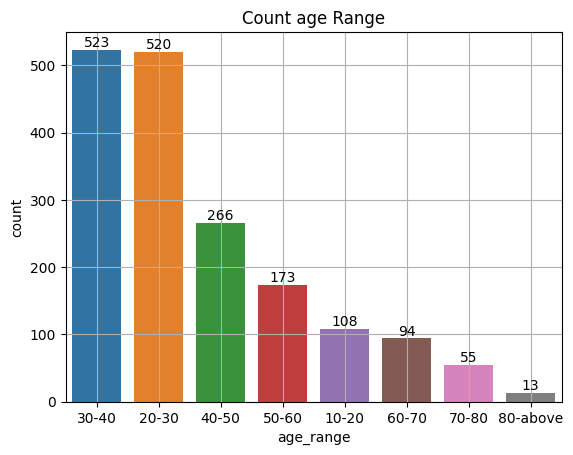

In [26]:
ax=sns.barplot(x=p1['age_range'],y=p1['count'])
ax.bar_label(ax.containers[0])
plt.title('Count age Range')
plt.grid()
plt.show()

### Count Sex

In [27]:
ndf.head(2)

,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_range
0,194,263.54,Level 0 Recovery,19,Male,10-20
1,486,416.09,Level 0 Recovery,25,Female,20-30


In [28]:
p2=ndf['sex'].value_counts()
p2=pd.DataFrame(p2)
p2=p2.reset_index()
p2


,sex,count
0,Male,902
1,Female,850


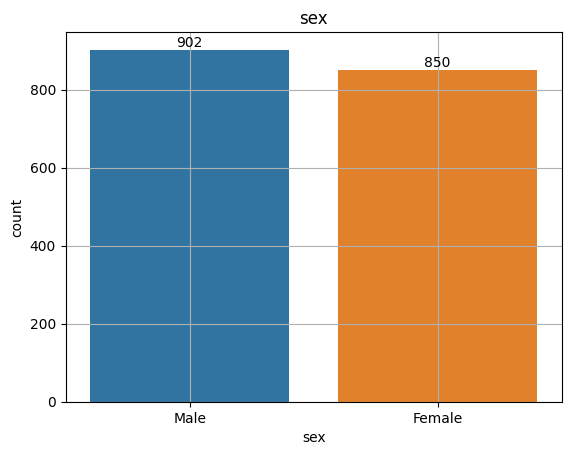

In [ ]:
ax=sns.barplot(x=p2['sex'],y=p2['count'])
ax.bar_label(ax.containers[0])
plt.title('sex')
plt.grid()
plt.show()

Count recovery_strategy

In [ ]:
ndf.head(2)

,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_range
0,194,263.54,Level 0 Recovery,19,Male,10-20
1,486,416.09,Level 0 Recovery,25,Female,20-30


In [ ]:
p2=ndf['recovery_strategy'].value_counts()
p2=pd.DataFrame(p2)
p2=p2.reset_index()
p2

,recovery_strategy,count
0,Level 1 Recovery,670
1,Level 3 Recovery,357
2,Level 2 Recovery,333
3,Level 0 Recovery,247
4,Level 4 Recovery,145


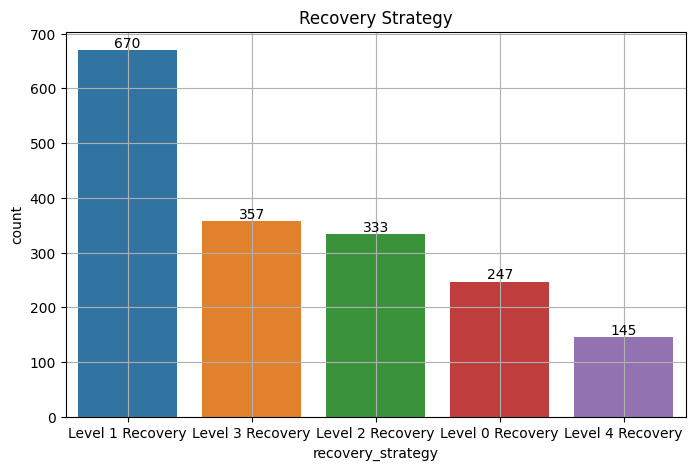

In [ ]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=p2['recovery_strategy'],y=p2['count'])
ax.bar_label(ax.containers[0])
plt.title('Recovery Strategy')
plt.grid()
plt.show()

## relation between expected_recovery_amount and actual_recovery_amount

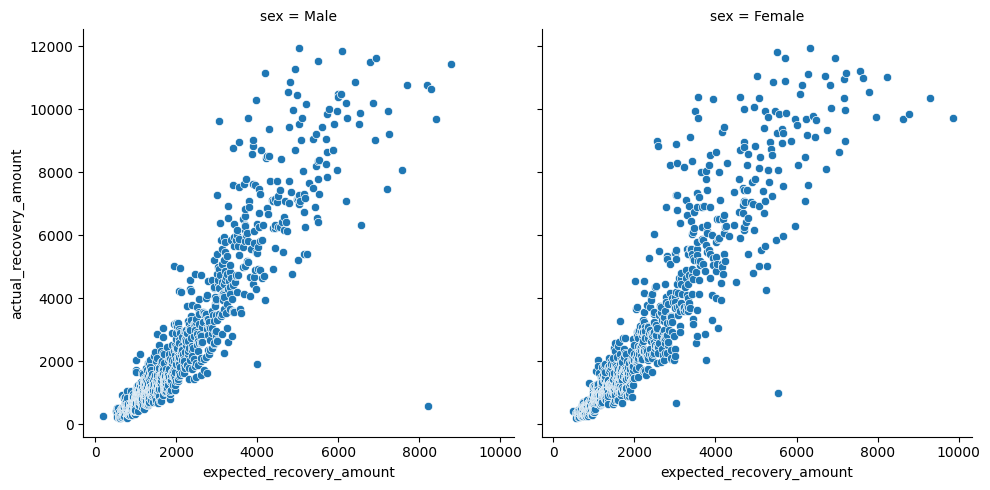

In [ ]:
sns.relplot(data=ndf,x='expected_recovery_amount',y='actual_recovery_amount',col='sex')
plt.show()


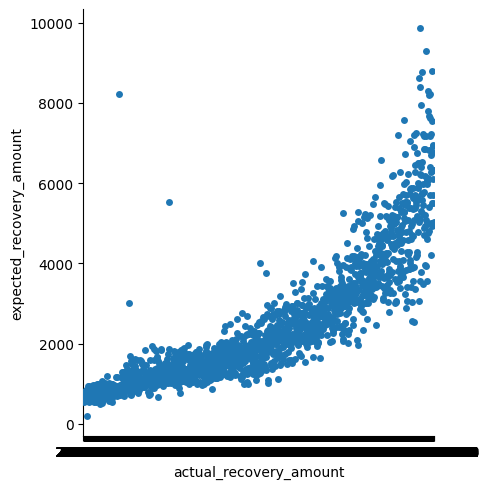

In [ ]:
sns.catplot(x='actual_recovery_amount',y='expected_recovery_amount',data=ndf)


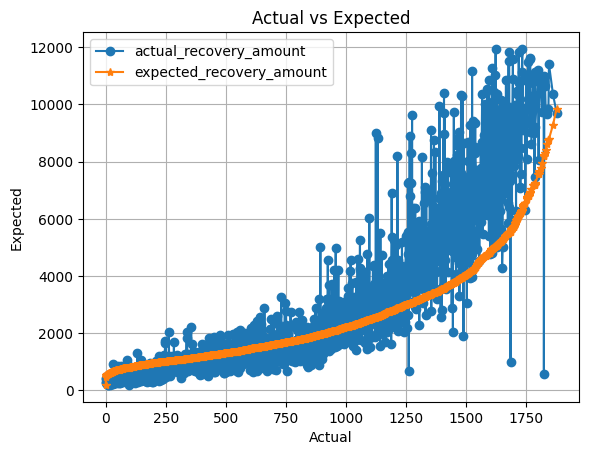

In [ ]:
data1 =ndf['actual_recovery_amount']
data2 =ndf['expected_recovery_amount']
plt.plot(data1,marker='o',label="actual_recovery_amount")
plt.plot(data2,marker='*',label='expected_recovery_amount')
plt.title('Actual vs Expected')
plt.xlabel('Actual')
plt.ylabel('Expected')
plt.legend()
plt.grid()
plt.show()

## recovery strategy wise total actual recovery amount

In [ ]:
ndf.head(2)

,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_range
0,194,263.54,Level 0 Recovery,19,Male,10-20
1,486,416.09,Level 0 Recovery,25,Female,20-30


In [ ]:
pdf = ndf.groupby('recovery_strategy').agg(
maximum_actual_recovery_amount=('actual_recovery_amount','sum'))
pdf=pdf.reset_index().sort_values(by='maximum_actual_recovery_amount',ascending=False)
pdf

,recovery_strategy,maximum_actual_recovery_amount
3,Level 3 Recovery,2.091710e+06
4,Level 4 Recovery,1.277391e+06
2,Level 2 Recovery,9.713328e+05
1,Level 1 Recovery,8.721319e+05
0,Level 0 Recovery,1.286937e+05


## Sexwise total average actual recovery amount

In [ ]:
ndf.head(2)

,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_range
0,194,263.54,Level 0 Recovery,19,Male,10-20
1,486,416.09,Level 0 Recovery,25,Female,20-30


In [ ]:
pdf = ndf.groupby('sex').agg(
total_actual_recovery_amt=('actual_recovery_amount','sum')
)
pdf=pdf.reset_index().sort_values(by='total_actual_recovery_amt',ascending=False)
pdf

,sex,total_actual_recovery_amt
0,Female,2.725188e+06
1,Male,2.616071e+06


## recovery_strategy with sex

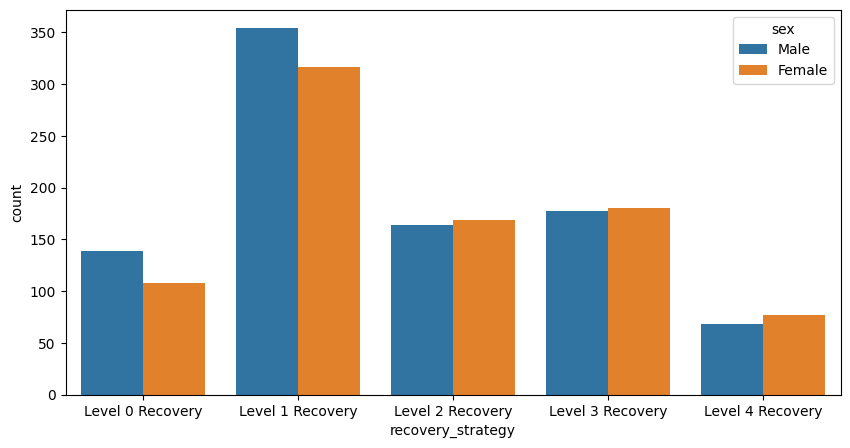

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=ndf,x='recovery_strategy',hue='sex')
plt.show()

Count plot compares the distribution of recovery strategies based on gender.

## Expected recovery amount with sex

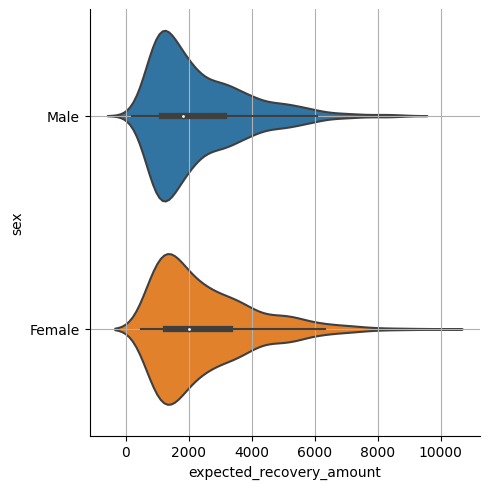

In [ ]:
sns.catplot(x='expected_recovery_amount',y='sex',data=ndf,kind='violin')
plt.grid()
plt.show()


Violin plot shows expected recovery amounts' distribution for males and females, highlighting gender differences.

# age vs. expected recovery amount

In [ ]:
ndf.head(2)

,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_range
0,194,263.54,Level 0 Recovery,19,Male,10-20
1,486,416.09,Level 0 Recovery,25,Female,20-30


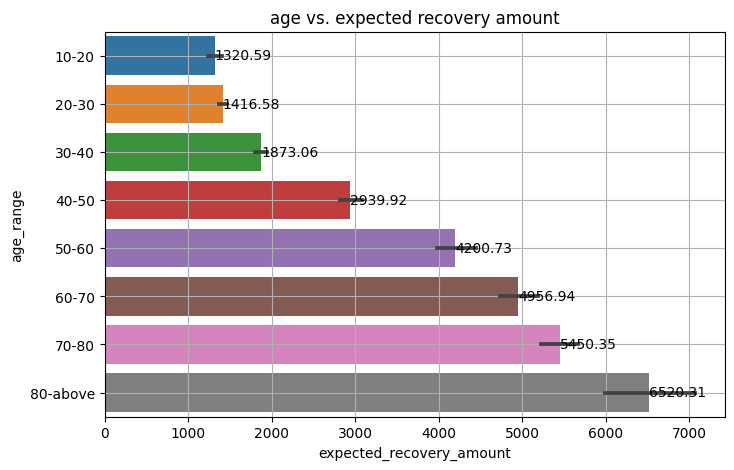

In [ ]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=ndf['expected_recovery_amount'],y=ndf['age_range'])
ax.bar_label(ax.containers[0])
plt.title('age vs. expected recovery amount')
plt.grid()
plt.show()

The data covers a relatively old age group (80-above), indicating that these recovery cases involve oldest individual

# age vs. actual recovery amount

In [ ]:
ndf.head(2)

,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_range
0,194,263.54,Level 0 Recovery,19,Male,10-20
1,486,416.09,Level 0 Recovery,25,Female,20-30


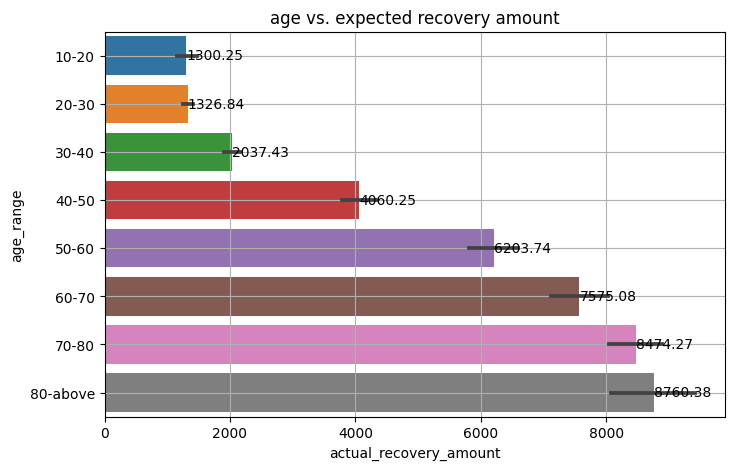

In [ ]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=ndf['actual_recovery_amount'],y=ndf['age_range'])
ax.bar_label(ax.containers[0])
plt.title('age vs. expected recovery amount')
plt.grid()
plt.show()

The data covers a relatively old age group (80-above), indicating that these recovery cases involve oldest individual

 # sex vs. expected recovery amount

In [ ]:
ndf.head(2)

,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_range
0,194,263.54,Level 0 Recovery,19,Male,10-20
1,486,416.09,Level 0 Recovery,25,Female,20-30


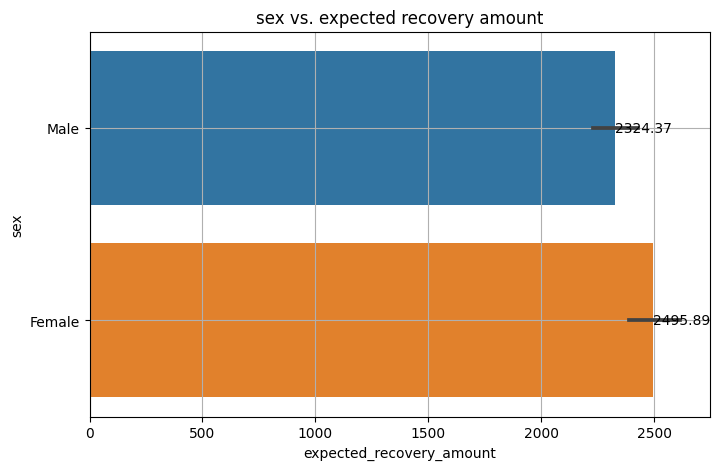

In [ ]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=ndf['expected_recovery_amount'],y=ndf['sex'])
ax.bar_label(ax.containers[0])
plt.title('sex vs. expected recovery amount')
plt.grid()
plt.show()

Visual comparison of expected recovery amounts between males and females, highlighting disparities in recovery predictions.

 # sex vs. actual recovery amount

In [ ]:
ndf.head(2)

,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_range
0,194,263.54,Level 0 Recovery,19,Male,10-20
1,486,416.09,Level 0 Recovery,25,Female,20-30


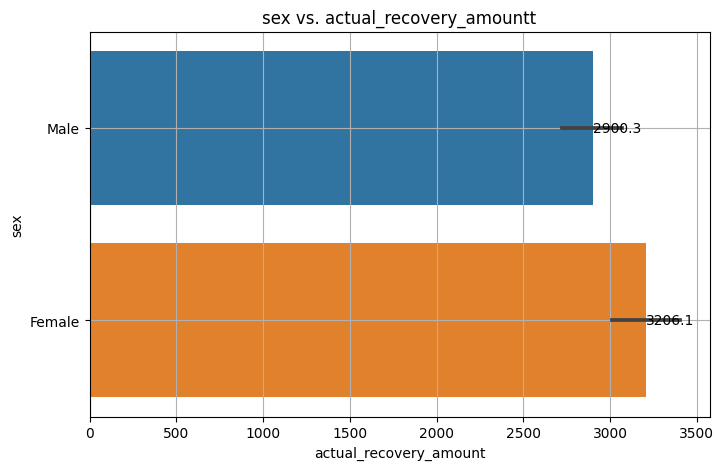

In [ ]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=ndf['actual_recovery_amount'],y=ndf['sex'])
ax.bar_label(ax.containers[0])
plt.title('sex vs. actual_recovery_amountt')
plt.grid()
plt.show()

Compare actual recovery amounts between males and females using a labeled bar plot for clear insights into disparities and patterns in recovery outcomes.

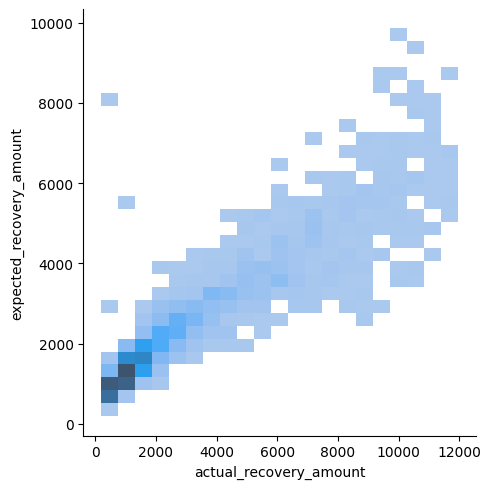

In [51]:
sns.displot(x=ndf['actual_recovery_amount'],y=ndf['expected_recovery_amount'],data=ndf)

 # Conclusion :
 ## Certainly! The data reveals intriguing patterns in recovery outcomes, showcasing the impact of age and gender on the effectiveness of different recovery strategies. These findings underscore the significance of tailored approaches for diverse demographic groups, potentially leading to more impressive recovery results with targeted interventions.

 